## TASK 1

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
# Load the dataset
iris_df = pd.read_csv('Iris.csv')
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Data Preprocessing

In [3]:
# Check for missing values
print("\nMissing values in each column:")
print(iris_df.isnull().sum())


Missing values in each column:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [4]:
# Encode the target variable (Species) from strings to numerical values
label_encoder = LabelEncoder()
iris_df['Species_encoded'] = label_encoder.fit_transform(iris_df['Species'])

In [5]:
# Verify the encoding
print("\nSpecies encoding mapping:")
for i, species in enumerate(label_encoder.classes_):
    print(f"{species}: {i}")


Species encoding mapping:
Iris-setosa: 0
Iris-versicolor: 1
Iris-virginica: 2


#### Prepare features and target

In [6]:
# We'll drop the Id column as it's not a meaningful feature
X = iris_df.drop(['Id', 'Species', 'Species_encoded'], axis=1)
y = iris_df['Species_encoded']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Display the shapes of the resulting datasets
print("\nData shapes:")
print(f"Training features: {X_train.shape}")
print(f"Testing features: {X_test.shape}")
print(f"Training labels: {y_train.shape}")
print(f"Testing labels: {y_test.shape}")


Data shapes:
Training features: (120, 4)
Testing features: (30, 4)
Training labels: (120,)
Testing labels: (30,)


#### Model Training

In [8]:
# Create a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Model Evaluation

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Model Evaluation Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000


In [9]:
# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



#### decision tree

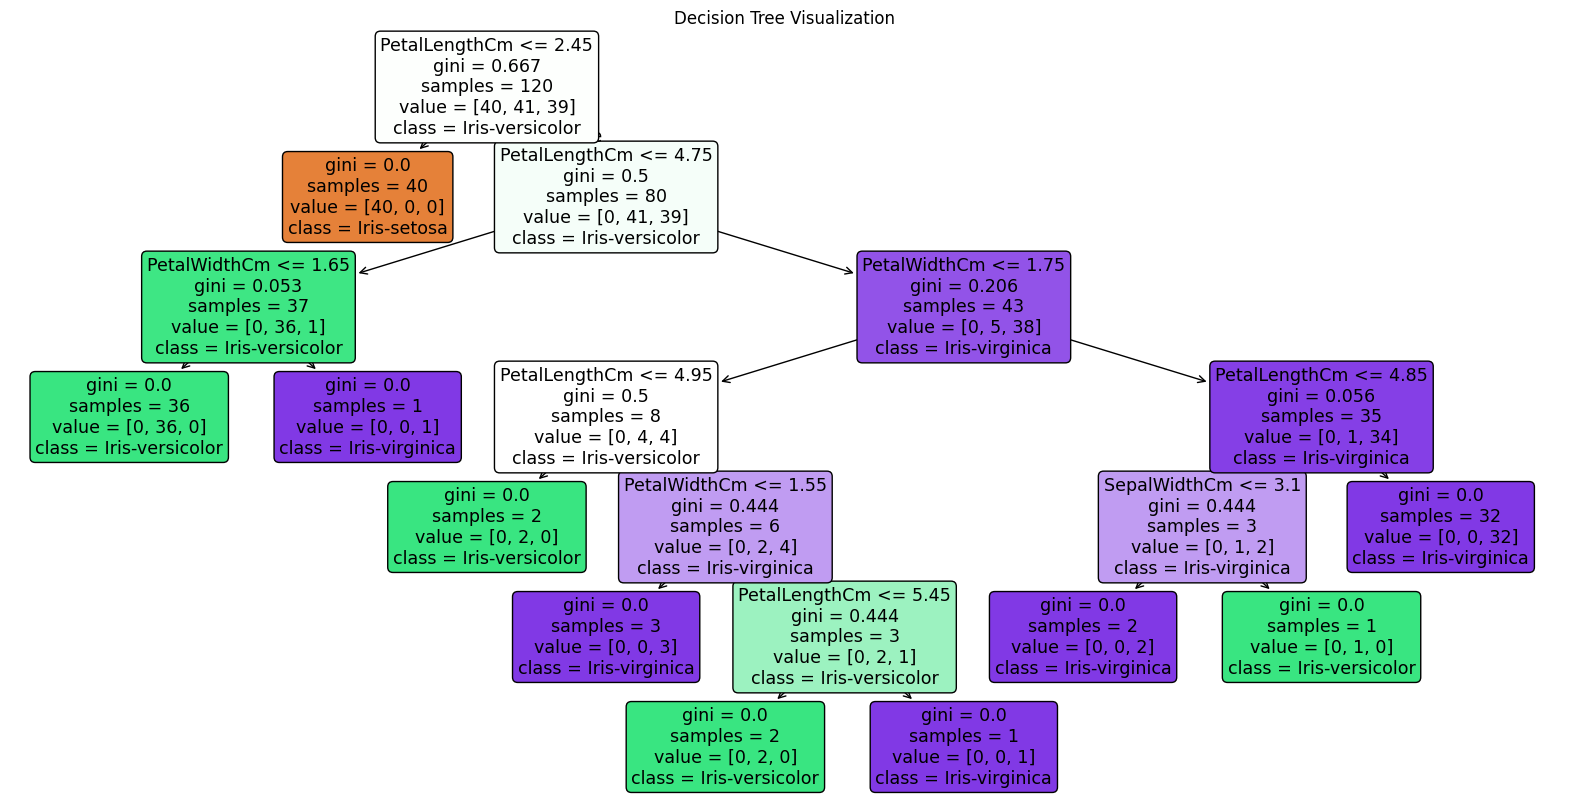

In [10]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf, 
              feature_names=X.columns, 
              class_names=label_encoder.classes_, 
              filled=True, 
              rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

In [11]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': clf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
         Feature  Importance
2  PetalLengthCm    0.906143
3   PetalWidthCm    0.077186
1   SepalWidthCm    0.016670
0  SepalLengthCm    0.000000


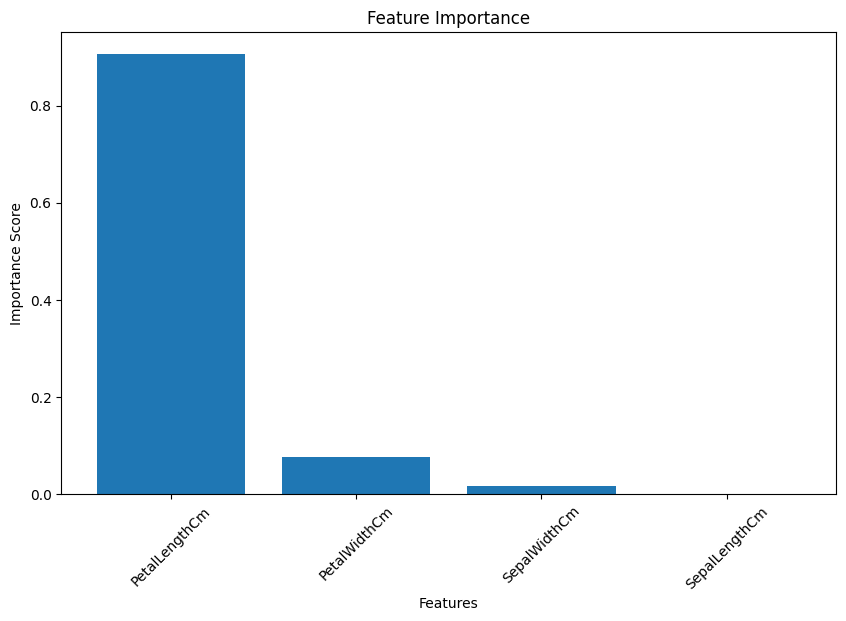

In [12]:
# Plot feature importance
plt.figure(figsize=(10,6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)
plt.show()